In [49]:
import numpy as np
import matplotlib.pyplot as plt


def lin_force_kernel_fs(x, y, xf, yf, w, nu, mu):
    """
    Compute displacement and stress kernels for a linearly varying force on a horizontal source element.

    Parameters:
    x, y : array_like
        Observation locations provided as individual vectors [Nobs x 1]
    xf, yf : float
        Source element center location
    w : float
        Source element half-length
    nu, mu : float
        Elastic parameters (Poisson's ratio and Shear Modulus)

    Returns:
    Disp : ndarray
        Displacement kernels [Nobs x (ux or uy) x (fx or fy) x 2 basis functions]
    Stress, Strain : ndarray
        Stress and strain kernels [Nobs x (sxx, sxy, syy) x (fx or fy) x 2 basis functions]
    """

    Nobs = len(x)

    xo = x - xf
    yo = y - yf

    # Displacement kernels
    def ux_1(fx, fy, w):
        term1 = (
            (1 / 8)
            * fx
            * w ** (-1)
            * (w - xo)
            * (3 * w + xo)
            * mu ** (-1)
            * nu
            * (np.pi - np.pi * nu) ** (-1)
            * np.log((w - xo) ** 2 + yo**2)
        )
        term2 = (
            (1 / 32)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                4 * w * (8 * w * (nu - 1) + xo * (-3 + 4 * nu))
                - 16 * (w + xo) * yo * (nu - 1) * np.arctan((w - xo) / yo)
                - 16 * (w + xo) * yo * (nu - 1) * np.arctan((w + xo) / yo)
                + (3 * (w - xo) * (3 * w + xo) + yo**2 * (5 - 4 * nu))
                * np.log((w - xo) ** 2 + yo**2)
                + (
                    3 * (w + xo) ** 2
                    - 5 * yo**2
                    - 4 * (w + xo - yo) * (w + xo + yo) * nu
                )
                * np.log((w + xo) ** 2 + yo**2)
            )
        )
        term3 = (
            (1 / 16)
            * fy
            * np.pi ** (-1)
            * w ** (-1)
            * yo
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                4 * w
                - 2 * yo * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
                + (w + xo)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )
        return (term1 + term2 + term3) / 2

    def ux_2(fx, fy, w):
        term1 = (
            (1 / 64)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * (w - xo) ** 2
            * mu ** (-1)
            * (3 - 4 * nu)
            * (nu - 1) ** (-1)
            * np.log((w - xo) ** 2 + yo**2)
        )
        term2 = (
            (1 / 32)
            * np.pi ** (-1)
            * w ** (-1)
            * (w - xo)
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                (-8)
                * fx
                * yo
                * (nu - 1)
                * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
                + fy * yo * np.log((w - xo) ** 2 + yo**2)
            )
        )
        term3 = (
            (1 / 64)
            * np.pi ** (-1)
            * w ** (-1)
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                4
                * w
                * ((-2) * fy * yo + fx * xo * (3 - 4 * nu) + 8 * fx * w * (nu - 1))
                + yo**2
                * (
                    4 * fy * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
                    + fx * (-5 + 4 * nu) * np.log((w - xo) ** 2 + yo**2)
                )
                + (
                    2 * fy * (xo - w) * yo
                    + fx
                    * (
                        3 * (3 * w - xo) * (w + xo)
                        + 5 * yo**2
                        - 4 * (3 * w - xo) * (w + xo) * nu
                    )
                )
                * np.log((w + xo) ** 2 + yo**2)
            )
        )
        return term1 + term2 + term3

    def uy_1(fx, fy, w):
        term1 = (
            (1 / 32)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * yo
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                4 * w
                - 2 * yo * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
                + (w + xo)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )
        term2 = (
            (1 / 64)
            * fy
            * np.pi ** (-1)
            * w ** (-1)
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                4 * w * (2 * w + xo) * (-3 + 4 * nu)
                + 8 * (w + xo) * yo * (nu * 2 - 1) * np.arctan((-w + xo) / yo)
                - 8 * (w + xo) * yo * (nu * 2 - 1) * np.arctan((w + xo) / yo)
                + (
                    w**2 * (9 - 12 * nu)
                    + yo**2 * (1 - 4 * nu)
                    + 2 * w * xo * (-3 + 4 * nu)
                    + xo**2 * (-3 + 4 * nu)
                )
                * np.log((w - xo) ** 2 + yo**2)
                - (
                    (
                        -3 * (w + xo) ** 2
                        + yo**2
                        + 4 * (w + xo - yo) * (w + xo + yo) * nu
                    )
                )
                * np.log((w + xo) ** 2 + yo**2)
            )
        )
        return term1 + term2

    def uy_2(fx, fy, w):
        term1_fx = fx * (
            (-1 / 32)
            * np.pi ** (-1)
            * w ** (-1)
            * yo
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                4 * w
                - 2 * yo * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
                + (-w + xo) * np.log((w - xo) ** 2 + yo**2)
            )
            + (w - xo)
            * yo
            * (32 * np.pi * w * mu * (-1 + nu)) ** (-1)
            * np.log(w**2 + 2 * w * xo + xo**2 + yo**2)
        )

        term2_fy = fy * (
            (-1 / 8)
            * np.pi ** (-1)
            * w ** (-1)
            * (w - xo)
            * yo
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (2 * nu - 1)
            * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
            + (1 / 64)
            * np.pi ** (-1)
            * w ** (-1)
            * (w - xo) ** 2
            * mu ** (-1)
            * (3 - 4 * nu)
            * (nu - 1) ** (-1)
            * np.log((w - xo) ** 2 + yo**2)
            + (1 / 64)
            * np.pi ** (-1)
            * w ** (-1)
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                4 * w * (2 * w - xo) * (4 * nu - 3)
                + yo**2 * (4 * nu - 1) * np.log((w - xo) ** 2 + yo**2)
                + (
                    3 * (3 * w - xo) * (w + xo)
                    + yo**2
                    - 4 * (3 * w - xo) * (w + xo) * nu
                    + yo**2 * (1 - 4 * nu)
                )
                * np.log((w + xo) ** 2 + yo**2)
            )
        )

        return term1_fx + term2_fy

    # Stress kernels
    def sxy_1(fx, fy, w):
        term1 = (
            (-1 / 8)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * ((-1) + nu) ** (-1)
            * (
                2 * w * (w - xo) * yo * ((w - xo) ** 2 + yo**2) ** (-1)
                + 2 * (w + xo) * ((-1) + nu) * np.arctan((w - xo) / yo)
                + 2 * (w + xo) * ((-1) + nu) * np.arctan((w + xo) / yo)
                + (1 / 2)
                * yo
                * ((-3) + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        term2 = (
            (1 / 8)
            * fy
            * np.pi ** (-1)
            * w ** (-1)
            * ((-1) + nu) ** (-1)
            * (
                (-2) * w * (w - xo) ** 2 * ((w - xo) ** 2 + yo**2) ** (-1)
                + 4 * w * nu
                + 2 * yo * nu * np.arctan((-w + xo) / yo)
                + (-2) * yo * nu * np.arctan((w + xo) / yo)
                + (1 / 2)
                * (w + xo)
                * ((-1) + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        return term1 + term2

    def sxy_2(fx, fy, w):
        term1 = (
            (-1 / 16)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * ((-1 + nu) ** (-1))
            * (
                4 * w * (w + xo) * yo * ((w + xo) ** 2 + yo**2) ** (-1)
                + 4 * (w - xo) * (-1 + nu) * np.arctan((w - xo) / yo)
                + 4 * (w - xo) * (-1 + nu) * np.arctan((w + xo) / yo)
                + (-1)
                * yo
                * ((-3) + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        term2 = (
            (-1 / 16)
            * fy
            * np.pi ** (-1)
            * w ** (-1)
            * ((-1 + nu) ** (-1))
            * (
                (-4) * w * (w + xo) ** 2 * ((w + xo) ** 2 + yo**2) ** (-1)
                + 8 * w * nu
                + (-4) * yo * nu * np.arctan((w - xo) / yo)
                + (-4) * yo * nu * np.arctan((w + xo) / yo)
                + (-1)
                * (w - xo)
                * ((-1) + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        return term1 + term2

    def sxx_1(fx, fy, w):
        term1_fx = (
            (1 / 8)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * (-1 + nu) ** (-1)
            * (
                ((w - xo) ** 2 + yo**2) ** (-1)
                * ((-6) * w * (w - xo) ** 2 - 8 * w * yo**2)
                + 4 * w * nu
                - 2 * yo * (-2 + nu) * np.arctan((w - xo) / yo)
                - 2 * yo * (-2 + nu) * np.arctan((w + xo) / yo)
                + (1 / 2)
                * (w + xo)
                * (-3 + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        term2_fy = (
            (1 / 8)
            * fy
            * np.pi ** (-1)
            * w ** (-1)
            * (-1 + nu) ** (-1)
            * (
                2 * w * ((-w) + xo) * yo * ((w - xo) ** 2 + yo**2) ** (-1)
                + 2 * (w + xo) * nu * np.arctan((w - xo) / yo)
                + 2 * (w + xo) * nu * np.arctan((w + xo) / yo)
                + (1 / 2)
                * yo
                * (1 + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        return term1_fx + term2_fy

    def sxx_2(fx, fy, w):
        term1_fx = (
            (1 / 16)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * (-1 + nu) ** (-1)
            * (
                4
                * w
                * ((w + xo) ** 2 + yo**2) ** (-1)
                * (3 * (w + xo) ** 2 + 4 * yo**2 - 2 * ((w + xo) ** 2 + yo**2) * nu)
                + 4 * yo * (-2 + nu) * np.arctan((w - xo) / yo)
                + 4 * yo * (-2 + nu) * np.arctan((w + xo) / yo)
                + (w - xo)
                * (-3 + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        term2_fy = (
            (1 / 16)
            * fy
            * np.pi ** (-1)
            * w ** (-1)
            * (-1 + nu) ** (-1)
            * (
                (-4) * w * (w + xo) * yo * ((w + xo) ** 2 + yo**2) ** (-1)
                + 4 * (w - xo) * nu * np.arctan((w - xo) / yo)
                + 4 * (w - xo) * nu * np.arctan((w + xo) / yo)
                + (-1)
                * yo
                * (1 + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        return term1_fx + term2_fy

    def syy_1(fx, fy, w):
        term1_fx = (
            (-1 / 16)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * (-1 + nu) ** (-1)
            * (
                ((w - xo) ** 2 + yo**2) ** (-1)
                * ((-4) * w * (w - xo) ** 2 - 8 * w * yo**2)
                + 8 * w * nu
                - 4 * yo * (-1 + nu) * np.arctan((w - xo) / yo)
                - 4 * yo * (-1 + nu) * np.arctan((w + xo) / yo)
                + (w + xo)
                * (-1 + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        term2_fy = (
            (-1 / 8)
            * fy
            * np.pi ** (-1)
            * w ** (-1)
            * (-1 + nu) ** (-1)
            * (
                2 * w * ((-w) + xo) * yo * ((w - xo) ** 2 + yo**2) ** (-1)
                + 2 * (w + xo) * (-1 + nu) * np.arctan((w - xo) / yo)
                + 2 * (w + xo) * (-1 + nu) * np.arctan((w + xo) / yo)
                + (1 / 2)
                * yo
                * (-1 + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        return term1_fx + term2_fy

    def syy_2(fx, fy, w):
        term1_fx = (
            (-1 / 8)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * (-1 + nu) ** (-1)
            * (
                2
                * w
                * ((w + xo) ** 2 + yo**2) ** (-1)
                * ((w + xo) ** 2 + 2 * yo**2 - 2 * ((w + xo) ** 2 + yo**2) * nu)
                + 2 * yo * (-1 + nu) * np.arctan((w - xo) / yo)
                + 2 * yo * (-1 + nu) * np.arctan((w + xo) / yo)
                + (1 / 2)
                * (w - xo)
                * (-1 + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        term2_fy = (
            (-1 / 8)
            * fy
            * np.pi ** (-1)
            * w ** (-1)
            * (-1 + nu) ** (-1)
            * (
                (-2) * w * (w + xo) * yo * ((w + xo) ** 2 + yo**2) ** (-1)
                + 2 * (w - xo) * (-1 + nu) * np.arctan((w - xo) / yo)
                + 2 * (w - xo) * (-1 + nu) * np.arctan((w + xo) / yo)
                + (-1 / 2)
                * yo
                * (-1 + 2 * nu)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )

        return term1_fx + term2_fy

    Disp = np.zeros((Nobs, 2, 2, 2))
    Stress = np.zeros((Nobs, 3, 2, 2))

    # fx kernels
    Disp[:, 0, 0, :] = np.hstack([ux_1(1, 0, w), ux_2(1, 0, w)])
    Disp[:, 1, 0, :] = np.hstack([uy_1(1, 0, w), uy_2(1, 0, w)])
    Stress[:, 0, 0, :] = np.hstack([sxx_1(1, 0, w), sxx_2(1, 0, w)])
    Stress[:, 1, 0, :] = np.hstack([sxy_1(1, 0, w), sxy_2(1, 0, w)])
    Stress[:, 2, 0, :] = np.hstack([syy_1(1, 0, w), syy_2(1, 0, w)])

    # fy kernels
    Disp[:, 0, 1, :] = np.hstack([ux_1(0, 1, w), ux_2(0, 1, w)])
    Disp[:, 1, 1, :] = np.hstack([uy_1(0, 1, w), uy_2(0, 1, w)])
    Stress[:, 0, 1, :] = np.hstack([sxx_1(0, 1, w), sxx_2(0, 1, w)])
    Stress[:, 1, 1, :] = np.hstack([sxy_1(0, 1, w), sxy_2(0, 1, w)])
    Stress[:, 2, 1, :] = np.hstack([syy_1(0, 1, w), syy_2(0, 1, w)])

    return Disp, Stress

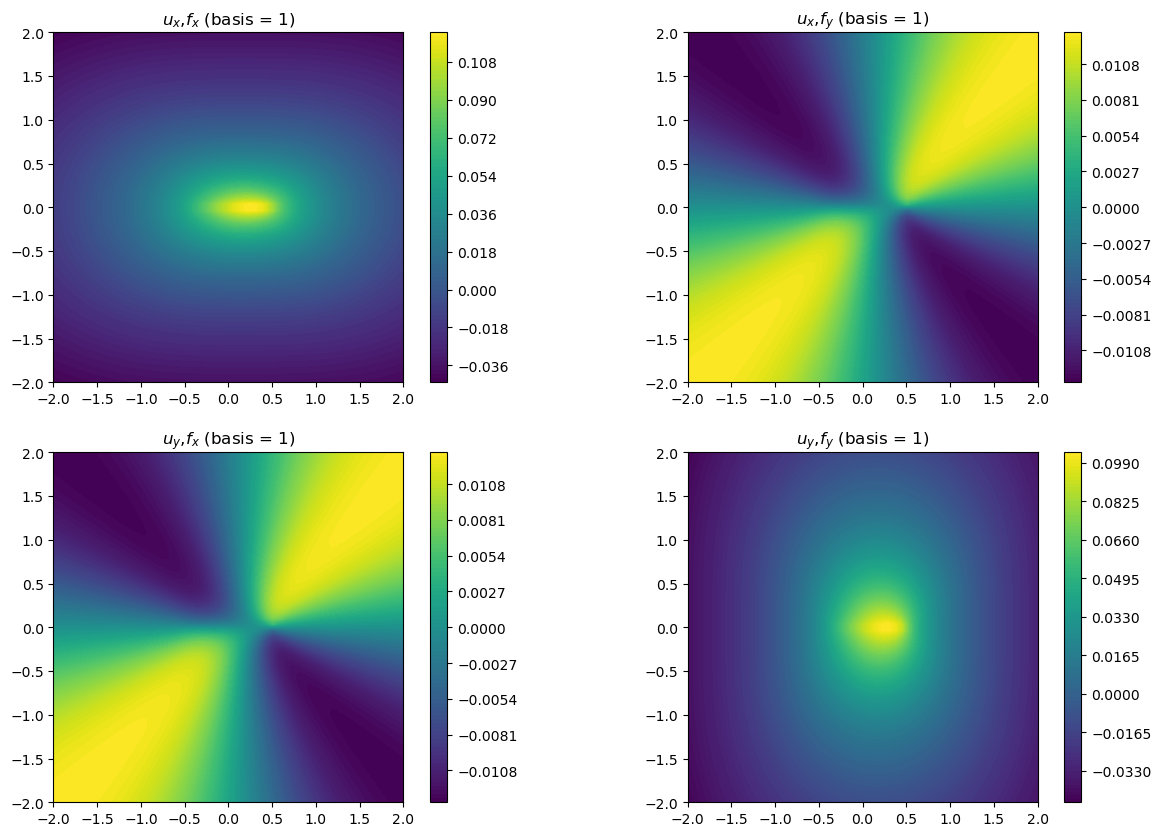

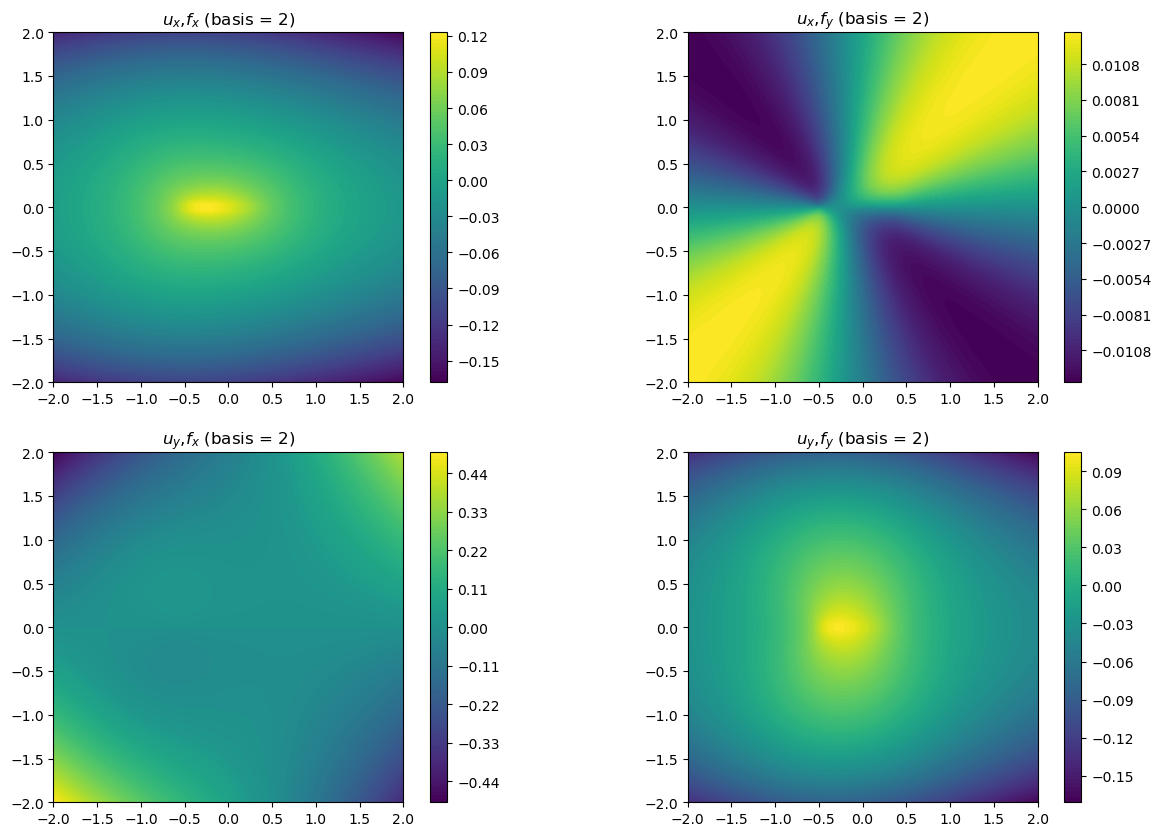

In [50]:
x_offset = 0.0
y_offset = 0.0

mu = 1
nu = 0.25
nx = 60
ny = 60
x_vec = np.linspace(-2.0, 2.0, nx)
y_vec = np.linspace(-2.0, 2.0, ny)
x_grid, y_grid = np.meshgrid(x_vec, y_vec)

# Displacement kernels [Nobs x (ux or uy) x (fx or fy) x 2 basis functions]
Dkernels, Skernels = lin_force_kernel_fs(
    x_grid.reshape(-1, 1),
    y_grid.reshape(-1, 1),
    xf=x_offset,
    yf=y_offset,
    w=0.5,
    nu=nu,
    mu=mu,
)

# plot displacements
for count in range(0, 2):
    basisfunc = count

    plt.figure(count + 1, figsize=(15, 10))
    for i in range(0, 2):
        for j in range(0, 2):
            plotval = i * 2 + j + 1
            toplot = Dkernels[:, i, j, basisfunc]
            plt.subplot(2, 2, plotval)
            plt.contourf(x_grid, y_grid, toplot.reshape(ny, nx), 100)
            plt.colorbar()
            if i == 0:
                str1 = "$u_x$"
            else:
                str1 = "$u_y$"
            if j == 0:
                str2 = "$f_x$"
            else:
                str2 = "$f_y$"
            plt.title(str1 + "," + str2 + " (basis = " + str(basisfunc + 1) + ")")
            plt.gca().set_aspect("equal", adjustable="box")
    plt.show()

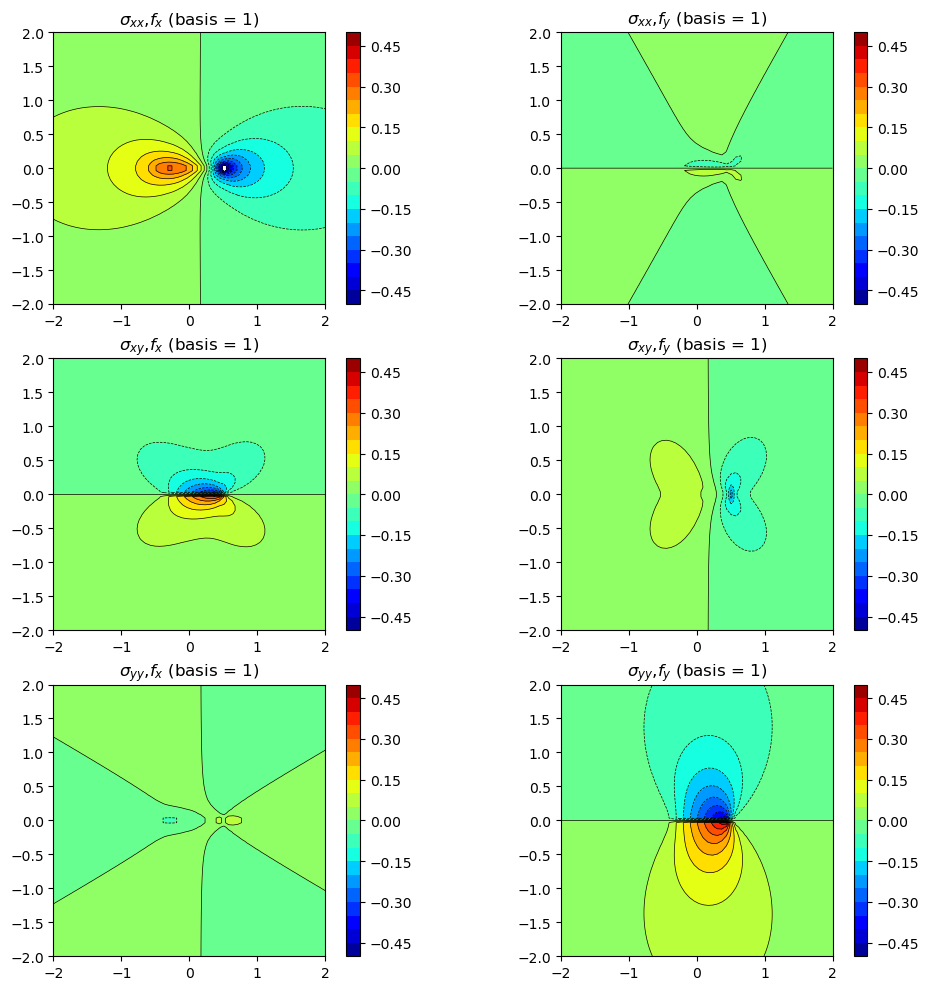

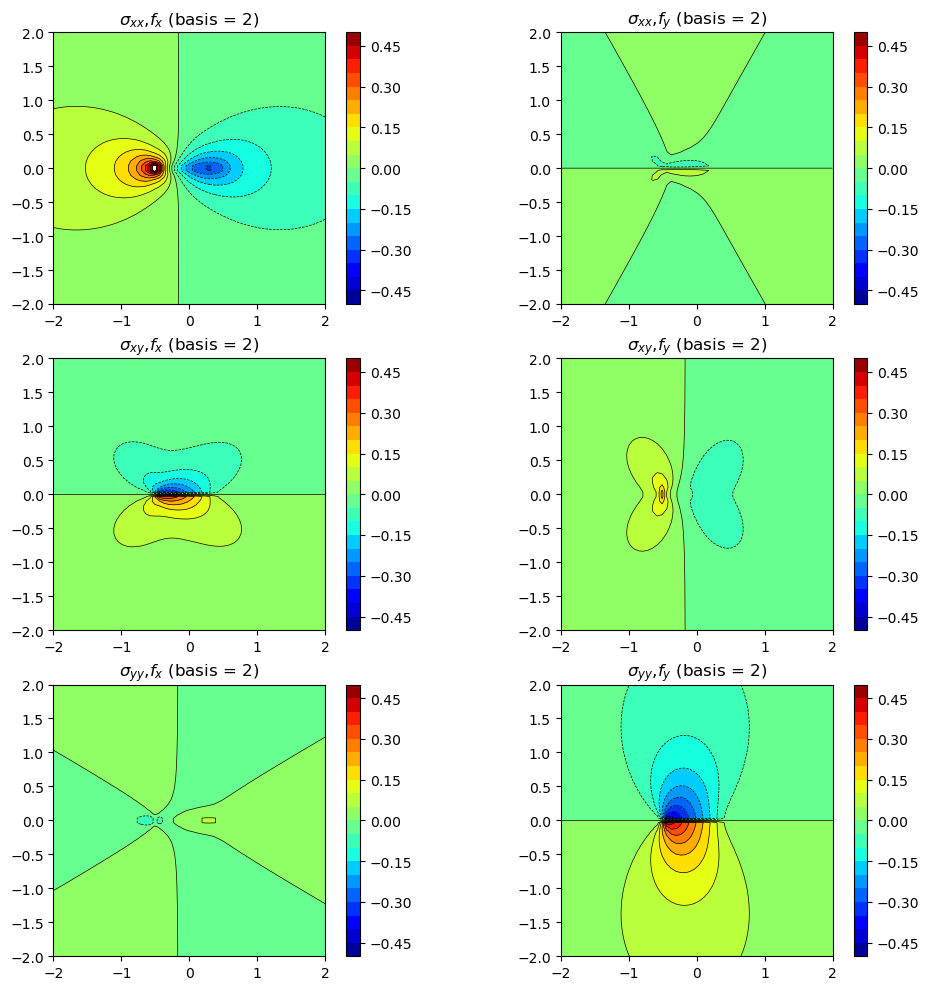

In [51]:
for count in range(0, 2):
    basisfunc = count

    plt.figure(count + 1, figsize=(12, 12))
    for i in range(0, 3):
        for j in range(0, 2):
            plotval = i * 2 + j + 1
            toplot = Skernels[:, i, j, basisfunc]
            plt.subplot(3, 2, plotval)
            plt.contourf(
                x_grid,
                y_grid,
                toplot.reshape(ny, nx),
                cmap="jet",
                levels=np.linspace(-0.5, 0.5, 21),
            )
            plt.colorbar()
            plt.contour(
                x_grid,
                y_grid,
                toplot.reshape(ny, nx),
                colors="k",
                levels=np.linspace(-0.5, 0.5, 21),
                linewidths=0.5,
            )

            plt.clim([-0.5, 0.5])
            if i == 0:
                str1 = "$\sigma_{xx}$"
            elif i == 1:
                str1 = "$\sigma_{xy}$"
            else:
                str1 = "$\sigma_{yy}$"
            if j == 0:
                str2 = "$f_x$"
            else:
                str2 = "$f_y$"
            plt.title(str1 + "," + str2 + " (basis = " + str(basisfunc + 1) + ")")
            plt.gca().set_aspect("equal", adjustable="box")
    plt.show()